In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

# 1. Сравним по регрессии

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()
X = data.data
y = data.target
z = data.feature_names
df = pd.DataFrame(np.c_[X,y], columns=list(z)+['target'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
RFR = RandomForestRegressor(random_state=42)
DTR = DecisionTreeRegressor(max_depth=6, min_samples_leaf=4,random_state=42)
LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
RFR.fit(X_train, y_train)
DTR.fit(X_train, y_train)
LR.fit(X_train, y_train)
y_pred_rfr = RFR.predict(X_test)
y_pred_dtr = DTR.predict(X_test)
y_pred_lr = LR.predict(X_test)

print(f'r2 for Random Forest is {r2_score(y_test, y_pred_rfr)}')
print(f'r2 for Decision tree is {r2_score(y_test, y_pred_dtr)}')
print(f'r2 for Linear Regression is {r2_score(y_test, y_pred_lr)}')

r2 for Random Forest is 0.8708997131330258
r2 for Decision tree is 0.8303565245160103
r2 for Linear Regression is 0.7112260057484912


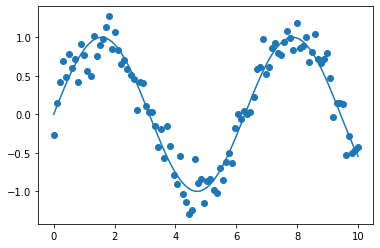

In [4]:
x = np.linspace(0,10,100)[:, np.newaxis]
y = np.sin(x)
y_noised = y + np.random.randn(100,1)*0.2
plt.plot(x,y)
plt.scatter(x,y_noised)


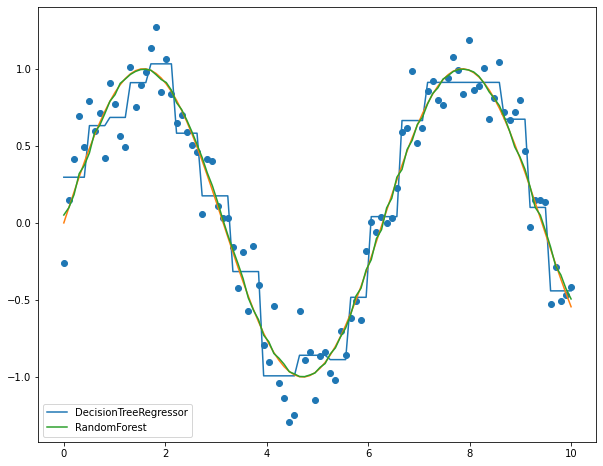

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(x, DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, random_state=42).fit(x,y_noised).predict(x), label='DecisionTreeRegressor')
plt.scatter(x,y_noised)
plt.plot(x,y)
plt.plot(x, RandomForestRegressor( random_state=42).fit(x,y).predict(x), label='RandomForest')
plt.legend()

Вывод: Случайный лес просто мощь, и не надо подбирать параметры.

# 2. Сравним по классификации

In [6]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [7]:
X = load_iris(as_frame=True)['data']
y = load_iris(as_frame=True)['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, y_train)
y_pred1 = RFC.predict(X_test)

accuracy_score(y_test, y_pred1), roc_auc_score(y_test, RFC. predict_proba(X_test), multi_class='ovo')

(1.0, 1.0)

In [9]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
X = data['data']
y = data['target']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, y_train)
y_pred1 = RFC.predict(X_test)

accuracy_score(y_test, y_pred1), roc_auc_score(y_test, RFC.predict(X_test))


(0.9707602339181286, 0.9636243386243386)